In [2]:
import talib as ta

In [3]:
close = np.random.rand(100)

NameError: name 'np' is not defined

In [4]:
def generate():
    import random
    import pandas as pd
    from datetime import datetime, timedelta

    # Define the number of trading days
    num_days = 30

    # Define the starting price for the first day
    start_price = 100

    # Define the volatility range for the price changes
    volatility = 0.05

    # Define the date range for the trading period
    start_date = datetime.now() - timedelta(days=num_days)
    end_date = datetime.now()

    # Generate random price data for each day
    prices = []
    for i in range(num_days):
        # Generate a random price movement factor
        price_movement = 1 + random.uniform(-volatility, volatility)
        # Calculate the opening, high, low, and closing prices
        open_price = start_price * price_movement
        high_price = open_price * (1 + random.uniform(0, volatility))
        low_price = open_price * (1 - random.uniform(0, volatility))
        close_price = low_price + random.uniform(0, 1) * (high_price - low_price)
        # Append the prices to the list
        prices.append([open_price, high_price, low_price, close_price])
        # Set the start price for the next day
        start_price = close_price

    # Create a DataFrame with the price data
    df = pd.DataFrame(prices, columns=['Open', 'High', 'Low', 'Close'])

    # Create a DataFrame with the date index
    dates = pd.date_range(start=start_date, end=end_date, freq='D')
    df.index = dates[:num_days]

    return df


In [5]:
data = generate()

In [7]:
import matplotlib.pyplot as plt

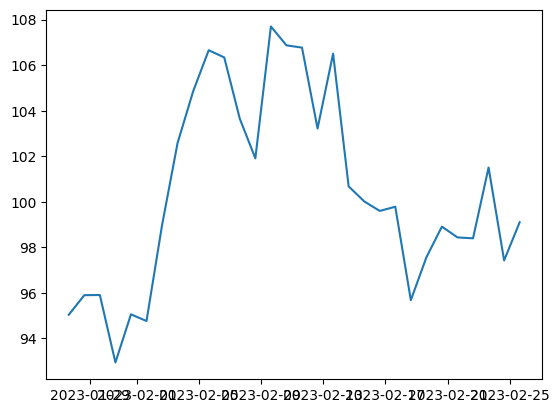

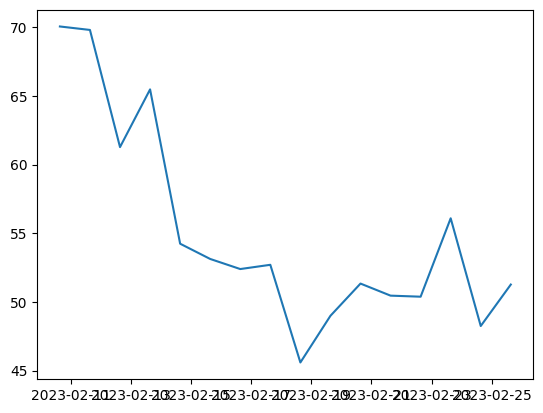

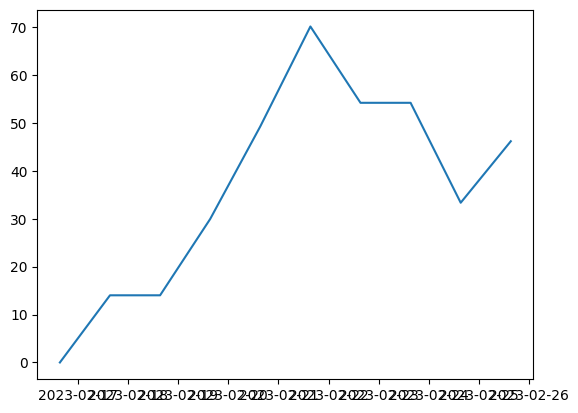

In [16]:
plt.plot(data.Close)
plt.show()
rsi = ta.RSI(data.Close, 14)
plt.plot(rsi)
plt.show()
k, d = ta.STOCH(rsi,rsi,rsi, 3, 3)
plt.plot(k)
plt.show()

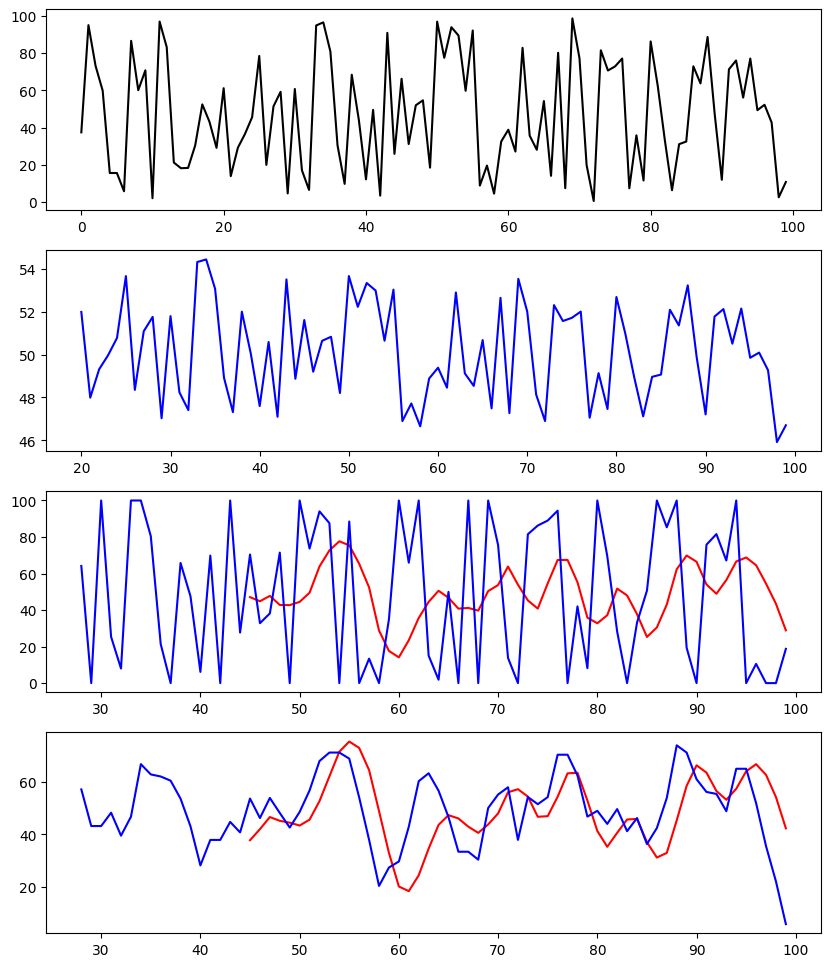

In [52]:
import talib
import numpy as np
import matplotlib.pyplot as plt

# Generate random market data
np.random.seed(42)
close_prices = np.random.random(100) * 100

# Calculate the Stochastic Oscillator
stoch, stoch_signal = talib.STOCH(high=close_prices, low=close_prices, close=close_prices)

# Calculate the Fast Stochastic Oscillator
fastk, fastd = talib.STOCHF(high=close_prices, low=close_prices, close=close_prices)

# Calculate the Stochastic RSI
k,d = talib.STOCHRSI(close_prices)

lenght = 20
fast = 5
slow = 5

rsi = talib.RSI(close_prices, lenght)
stoch_rsi_k, stoch_rsi_d = talib.STOCH(rsi, rsi, rsi, lenght, fast, slow)

stochrsi_k, stochrsi_d = talib.STOCHRSI(close_prices, lenght, fast , slow)

# Plot the results
fig, axs = plt.subplots(4, 1, figsize=(10, 12))
axs[0].plot(close_prices, color='black', label='Close Prices')

axs[1].plot(rsi, color='blue', label='rsi')

axs[2].plot(stoch_rsi_k, color='red', label='stoch_rsi_k')
axs[2].plot(stochrsi_k, color='blue', label='stochrsi_k')


axs[3].plot(stoch_rsi_d, color='red', label='stoch_rsi_d')
axs[3].plot(stochrsi_d, color='blue', label='stochrsi_d')


plt.show()


In [54]:
stoch_rsi_k[-1], stochrsi_d[-1]

(28.88884397511059, 5.8540425434576)

In [55]:
rsi_v = rsi[-6:]

In [56]:
s_k = (rsi_v[-1] - min(rsi_v)) / (max(rsi_v) - min(rsi_v)) * 100
print(s_k)

12.563399926432284
